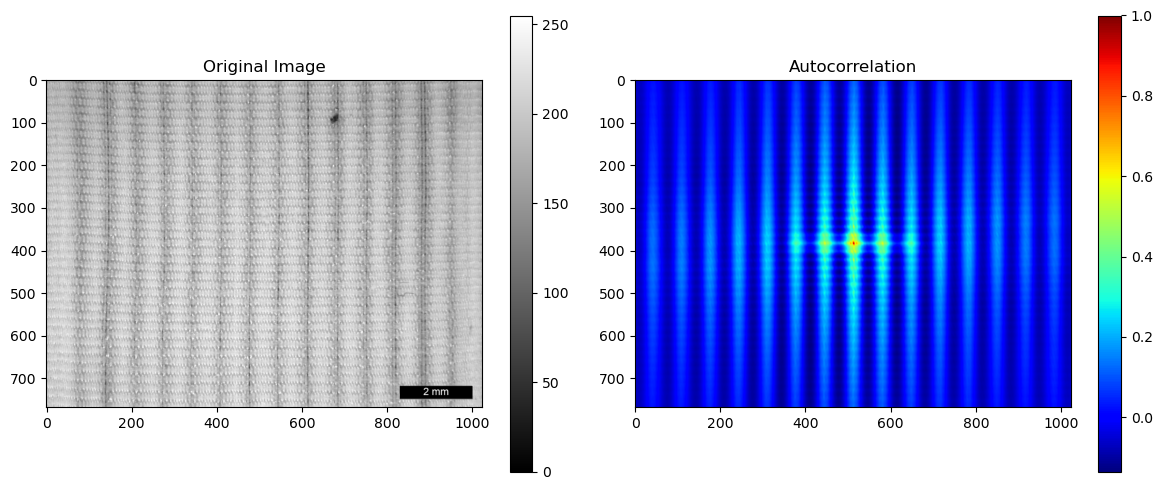

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Read and crop the image
img = cv2.imread('../image/img_03.tif')

# Convert to grayscale if it's a color image
if len(img.shape) > 2:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img

# Subtract the mean (important for autocorrelation)
img_centered = img_gray - np.mean(img_gray)

# Calculate autocorrelation using FFT method
# (faster for larger images)
autocorr = signal.fftconvolve(img_centered, img_centered[::-1, ::-1], mode='same')

# Normalize
autocorr = autocorr / np.max(autocorr)

# Display the autocorrelation
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.imshow(img_gray, cmap='gray')
plt.title('Original Image')
plt.colorbar()

plt.subplot(122)
plt.imshow(autocorr, cmap='jet')
plt.title('Autocorrelation')
plt.colorbar()

plt.tight_layout()
plt.show()


